In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Predicción continua

###### Descripción de los datos

En total hay 21 columnas el los datos, las cuáles se describen a continuación:

  - ID: Correlativo númerico que distingue cada una de las casas vendidas.
  - Date: Fecha en la cual fue vendida la casa.
  - Price: Precio de venta de la casa (en dólares norteamericanos).
  - Bedrooms: Número de cuartos en la casa.
  - Bathrooms: Número de baños disponibles en la casa, donde un valor de 0.5 representa un baño con inodoro pero si
  - Sqft_living15: Los pies cuadrados de espacio habitable de la casa interior para los 15 vecinos más cercanos.
  - Sqft_lot15: Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.n ducha.
  - Sqft_living: Número de pies cuadrados del espacio habitable de la casa.
  - Sqft_lot: Pies cuadrados del espacio total del terreno donde se ubica la casa.
  - Floors: Cantidad de pisos en la casa.
  - Waterfront: Variable que indica la presencia o no de vista al mar en la casa.
  - View: Índice del 0 al 4 que indica que tan buena es la vista de la propiedad.
  - Condition: Índice del 1 al 5 para calificar la condición actual de la casa.
  - Grade: Índice del 1 al 13, el cuál califica el nivel de calidad de construcción de la casa.
  - Sqft_above: Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo.
  - Sqft_basement: Los pies cuadrados del espacio interior de la casa. que está por debajo del nivel del suelo.
  - Yr_built: El año en fue construida la casa.
  - Yr_renovated: Año de la última renovación de la casa.
  - Zipcode: Código postal del areá donde se encuentra la casa.
  - Lat: Latitud de la ubicación de la casa.
  - Long: Longitud de la15 vecinos más cercanos.

In [29]:
data = pd.read_csv("regresion - House Price.csv",delimiter = ";")
data.head()

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,20141013T000000,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319
2,5631500400,20150225T000000,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,0,1933,82,0,0,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1,910,1965,49,0,0,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,2015,510000.0,3,2.00,1680,8080,1800,7503,...,0,0,1987,28,0,0,0,98074,47.6168,-122.045


## Regresión Lineal Simple

### Limpieza de datos

1. Verificar si hay algún dato nulo en la tabla

In [30]:
data.isna().sum() # no hay datos nulos, por lo que no hay que trabajar los nulos

id               0
date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
bsmt             0
sqft_bsmt        0
yr_built         0
age              0
yr_renovated     0
renov            0
age_renov        0
zipcode          0
lat              0
long             0
dtype: int64

2. En caso de que exista alguna columna de fecha que no esté en formato fecha, cambiar a formato fecha

In [31]:
data["date"] = pd.to_datetime(data["date"])
data.head(2)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319


### Análisis exploratorio

3. Graficar matriz de correlación. Cuales son las variables que no influyen en el precio (correlación menor a 0.2)?

    Mostrar los valores en la matriz con 2 decimales

In [32]:
correlation_matrix = data.corr().round(2)

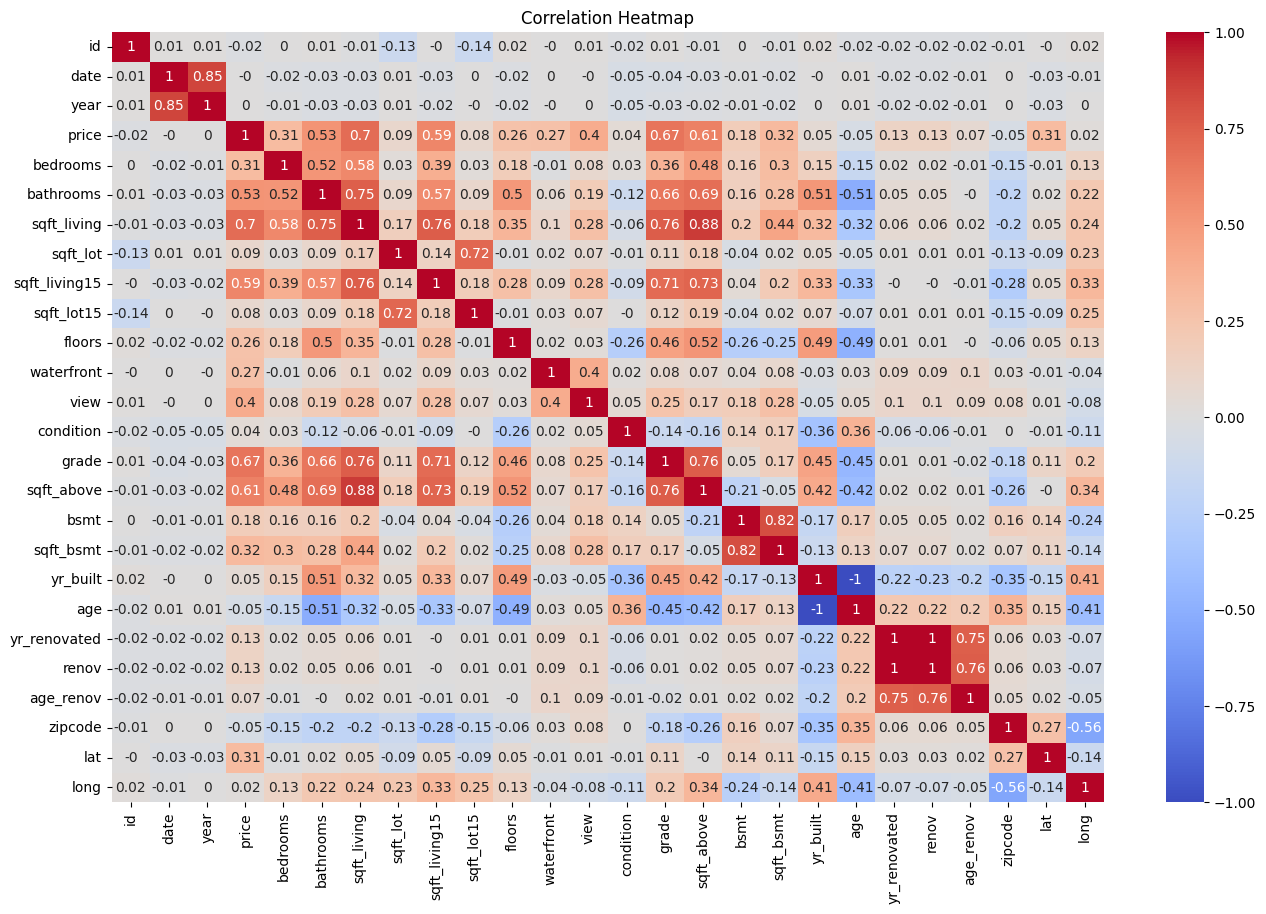

In [33]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [34]:
filtro = (correlation_matrix["price"] < 0.2) & (correlation_matrix["price"] > -0.2)
menos_relevantes = correlation_matrix.loc[filtro,:]
menos_relevantes

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
id,1.00,0.01,0.01,-0.02,0.00,0.01,-0.01,-0.13,-0.00,-0.14,...,0.00,-0.01,0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.00,0.02
date,0.01,1.00,0.85,-0.00,-0.02,-0.03,-0.03,0.01,-0.03,0.00,...,-0.01,-0.02,-0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,-0.01
year,0.01,0.85,1.00,0.00,-0.01,-0.03,-0.03,0.01,-0.02,-0.00,...,-0.01,-0.02,0.00,0.01,-0.02,-0.02,-0.01,0.00,-0.03,0.00
sqft_lot,-0.13,0.01,0.01,0.09,0.03,0.09,0.17,1.00,0.14,0.72,...,-0.04,0.02,0.05,-0.05,0.01,0.01,0.01,-0.13,-0.09,0.23
sqft_lot15,-0.14,0.00,-0.00,0.08,0.03,0.09,0.18,0.72,0.18,1.00,...,-0.04,0.02,0.07,-0.07,0.01,0.01,0.01,-0.15,-0.09,0.25
condition,-0.02,-0.05,-0.05,0.04,0.03,-0.12,-0.06,-0.01,-0.09,-0.00,...,0.14,0.17,-0.36,0.36,-0.06,-0.06,-0.01,0.00,-0.01,-0.11
bsmt,0.00,-0.01,-0.01,0.18,0.16,0.16,0.20,-0.04,0.04,-0.04,...,1.00,0.82,-0.17,0.17,0.05,0.05,0.02,0.16,0.14,-0.24
yr_built,0.02,-0.00,0.00,0.05,0.15,0.51,0.32,0.05,0.33,0.07,...,-0.17,-0.13,1.00,-1.00,-0.22,-0.23,-0.20,-0.35,-0.15,0.41
age,-0.02,0.01,0.01,-0.05,-0.15,-0.51,-0.32,-0.05,-0.33,-0.07,...,0.17,0.13,-1.00,1.00,0.22,0.22,0.20,0.35,0.15,-0.41
yr_renovated,-0.02,-0.02,-0.02,0.13,0.02,0.05,0.06,0.01,-0.00,0.01,...,0.05,0.07,-0.22,0.22,1.00,1.00,0.75,0.06,0.03,-0.07


4. Realizar la matriz de correlación excluyendo a estas variables poco significativas

In [35]:
filtro_bueno = (correlation_matrix["price"] > 0.2) | (correlation_matrix["price"] <  -0.2)
mas_relevantes = correlation_matrix.loc[filtro_bueno,:]
mas_relevantes

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
price,-0.02,-0.00,0.00,1.00,0.31,0.53,0.70,0.09,0.59,0.08,...,0.18,0.32,0.05,-0.05,0.13,0.13,0.07,-0.05,0.31,0.02
bedrooms,0.00,-0.02,-0.01,0.31,1.00,0.52,0.58,0.03,0.39,0.03,...,0.16,0.30,0.15,-0.15,0.02,0.02,-0.01,-0.15,-0.01,0.13
bathrooms,0.01,-0.03,-0.03,0.53,0.52,1.00,0.75,0.09,0.57,0.09,...,0.16,0.28,0.51,-0.51,0.05,0.05,-0.00,-0.20,0.02,0.22
sqft_living,-0.01,-0.03,-0.03,0.70,0.58,0.75,1.00,0.17,0.76,0.18,...,0.20,0.44,0.32,-0.32,0.06,0.06,0.02,-0.20,0.05,0.24
sqft_living15,-0.00,-0.03,-0.02,0.59,0.39,0.57,0.76,0.14,1.00,0.18,...,0.04,0.20,0.33,-0.33,-0.00,-0.00,-0.01,-0.28,0.05,0.33
floors,0.02,-0.02,-0.02,0.26,0.18,0.50,0.35,-0.01,0.28,-0.01,...,-0.26,-0.25,0.49,-0.49,0.01,0.01,-0.00,-0.06,0.05,0.13
waterfront,-0.00,0.00,-0.00,0.27,-0.01,0.06,0.10,0.02,0.09,0.03,...,0.04,0.08,-0.03,0.03,0.09,0.09,0.10,0.03,-0.01,-0.04
view,0.01,-0.00,0.00,0.40,0.08,0.19,0.28,0.07,0.28,0.07,...,0.18,0.28,-0.05,0.05,0.10,0.10,0.09,0.08,0.01,-0.08
grade,0.01,-0.04,-0.03,0.67,0.36,0.66,0.76,0.11,0.71,0.12,...,0.05,0.17,0.45,-0.45,0.01,0.01,-0.02,-0.18,0.11,0.20
sqft_above,-0.01,-0.03,-0.02,0.61,0.48,0.69,0.88,0.18,0.73,0.19,...,-0.21,-0.05,0.42,-0.42,0.02,0.02,0.01,-0.26,-0.00,0.34


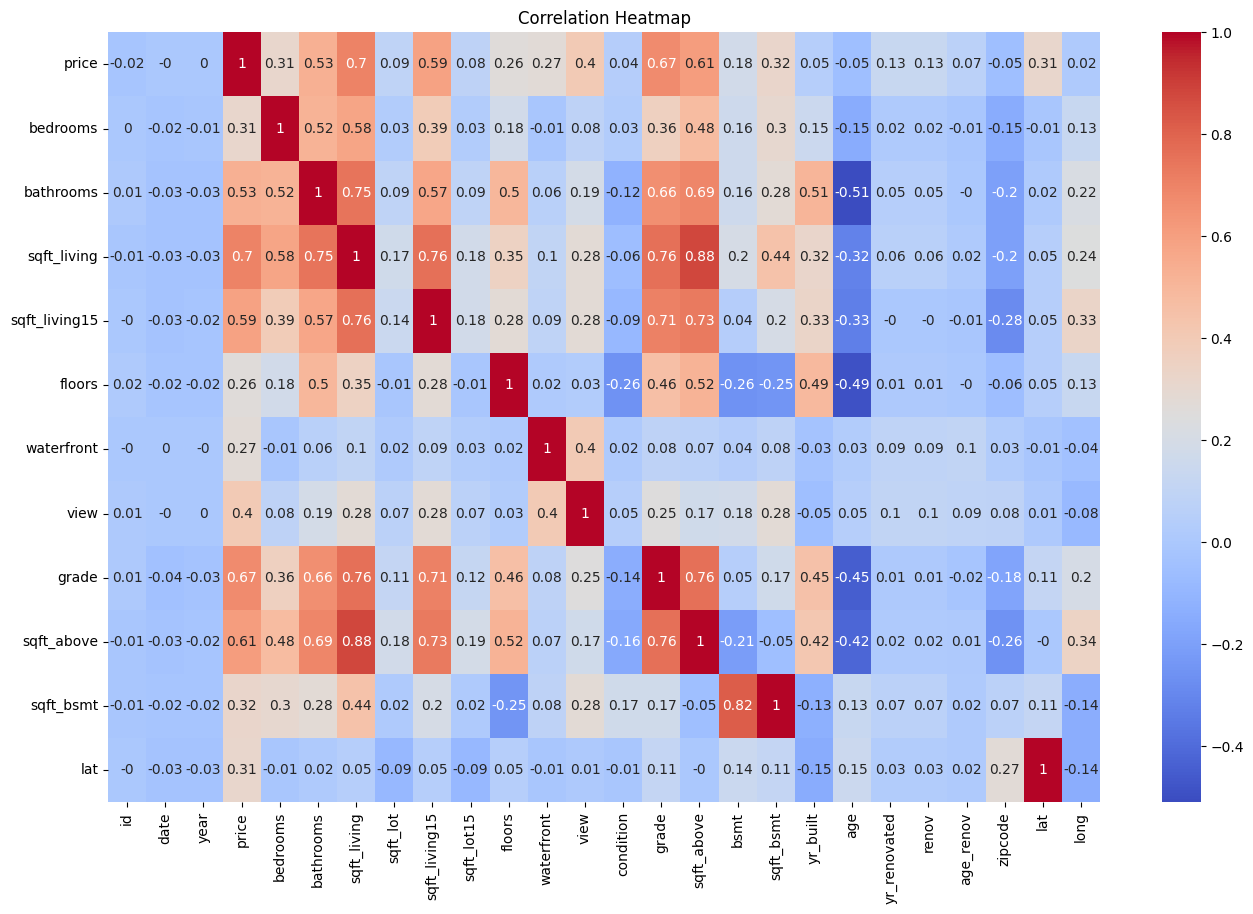

In [36]:
plt.figure(figsize=(16, 10))
sns.heatmap(mas_relevantes, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

5. Realizar un scatter plot de las tres variables con mayor coeficiente de correlación en función del precio.

   Nota: en caso de que dos gráficos se parezcan, verificar el coeficiente de correlación entre ambos gráficos

In [37]:
mas_relevantes.sort_values("price", ascending = False).iloc[1:4,0].index # 3 columnas más relevantes

Index(['sqft_living', 'grade', 'sqft_above'], dtype='object')

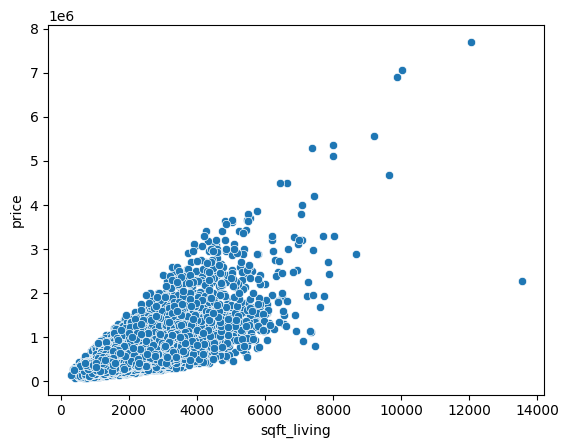

In [38]:
sns.scatterplot(x= data.sqft_living, y = data.price)
plt.show()

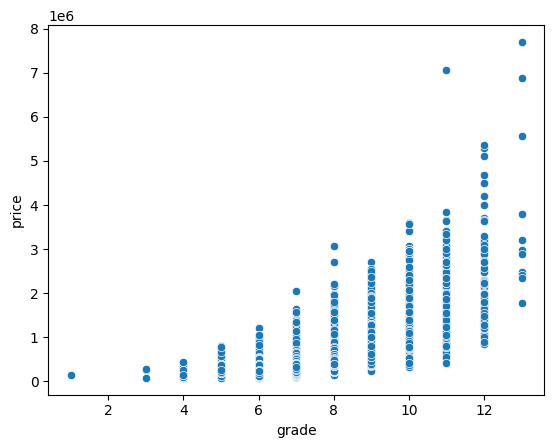

In [39]:
sns.scatterplot(x= data.grade, y = data.price)
plt.show()

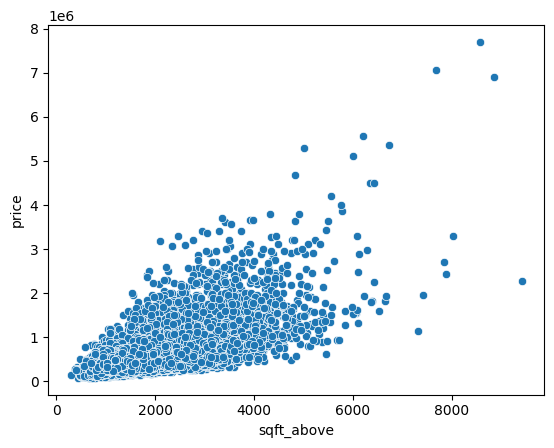

In [40]:
sns.scatterplot(x= data.sqft_above, y = data.price)
plt.show()

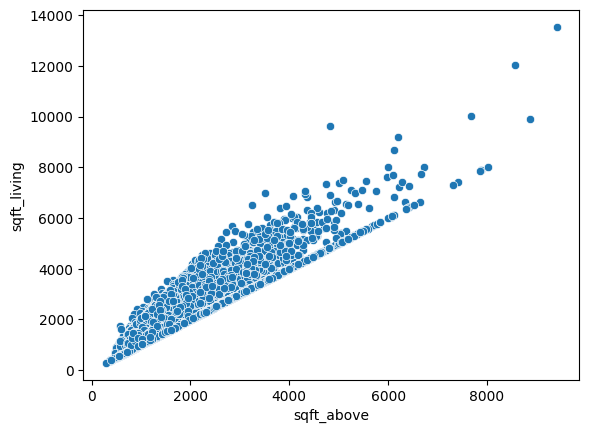

In [41]:
sns.scatterplot(x= data.sqft_above, y = data.sqft_living)
plt.show()

### Analisis predictivo

6. Realizar una regresión lineal para predecir el precio de las propiedades con sqft_living

In [42]:
lm = smf.ols(formula="price~sqft_living", data = data).fit()

7. Cuanto es el R^2 del modelo?

In [43]:
lm.rsquared

0.4928653865220144

8. Agregar a la tabla la columna con las predicciones de los precios en función del sqft_living

In [44]:
data["price_pred"] = lm.predict(data["sqft_living"])
data.head(2)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,price_pred
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,400,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585


9. Graficar en un mismo gráfico el precio en función de sqft_living (scatter) y la predicción del precio en función de sqft_living (line)

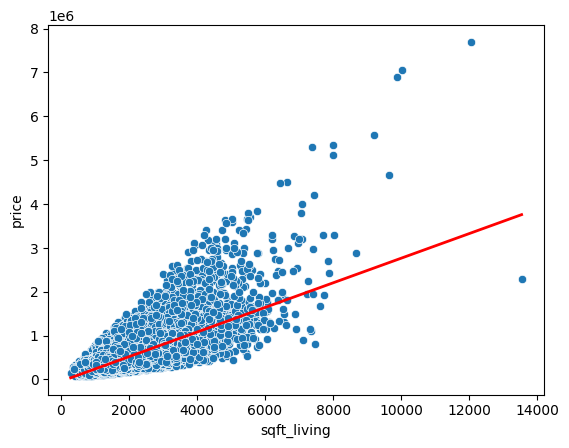

In [45]:
sns.scatterplot(x = data["sqft_living"], y =data["price"])

sns.lineplot(x = data["sqft_living"], y = data["price_pred"], c="red", linewidth = 2)
plt.show()

10. Agregar una columna que sea la predicción del precio calculado manualmente a partir de los parámetros del modelo

In [46]:
lm.params

Intercept     -43867.601534
sqft_living      280.806690
dtype: float64

In [47]:
b0 = lm.params.iloc[0]
b1 = lm.params.iloc[1]

data["price_pred_artesanal"] = b0 + b1 *data["sqft_living"]
data.head(5)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,price_pred,price_pred_artesanal
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585,677805.591585
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,2720,8062,...,1933,82,0,0,0,98028,47.7379,-122.233,172353.549712,172353.549712
3,2487200875,2014-12-09,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1965,49,0,0,0,98136,47.5208,-122.393,506513.510728,506513.510728
4,1954400510,2015-02-18,2015,510000.0,3,2.00,1680,8080,1800,7503,...,1987,28,0,0,0,98074,47.6168,-122.045,427887.637548,427887.637548


11. Calcular el error cuadrático medio del modelo

In [48]:
data["error_cuadratico"] = (data["price"]-data["price_pred_artesanal"])**2

Suma_error_cuadratico = sum(data["error_cuadratico"])
Suma_error_cuadratico

1479132984129925.0

In [49]:
Error_cuadratico_medio = np.sqrt(Suma_error_cuadratico/(len(data)-2))
Error_cuadratico_medio

261617.13131382994

12. Calcular el error promedio del modelo

In [50]:
sales_m = np.mean(data["price"])
error = Error_cuadratico_medio / sales_m

print(f"El error promedio es de un {round(error*100)}%")

El error promedio es de un 48%
